## Working with the IRIS dataset
1. Load the IRIS dataset (you can find it hereLinks to an external site.)
2. Select one pair of the numerical variables and plot them using a scatter plot. Make use of the `sns.lmplot()` to create the following lines:
- One for each group separately
- One overall regardless of groups
3. Create a scatterplot of the same (or different) pair of variables. Add a second legend which will show thew number of datapoints in each category.

In [120]:
# load libraries that i will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# load the iris dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [122]:
# viewing our columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [123]:
# viewing our data types to pick columns to plot
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

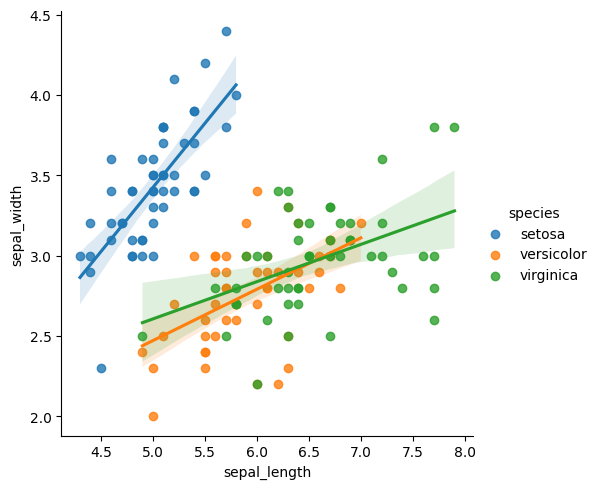

In [124]:
# plot scatter plot with regression lines one for each group of species separately
sns.lmplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.show()

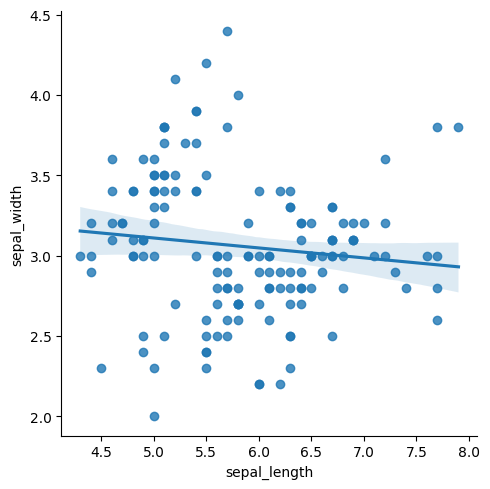

In [125]:
# plotting a scatter plot with one regression line overal regardless of the species group
sns.lmplot(data=df, x='sepal_length', y='sepal_width')
plt.show()

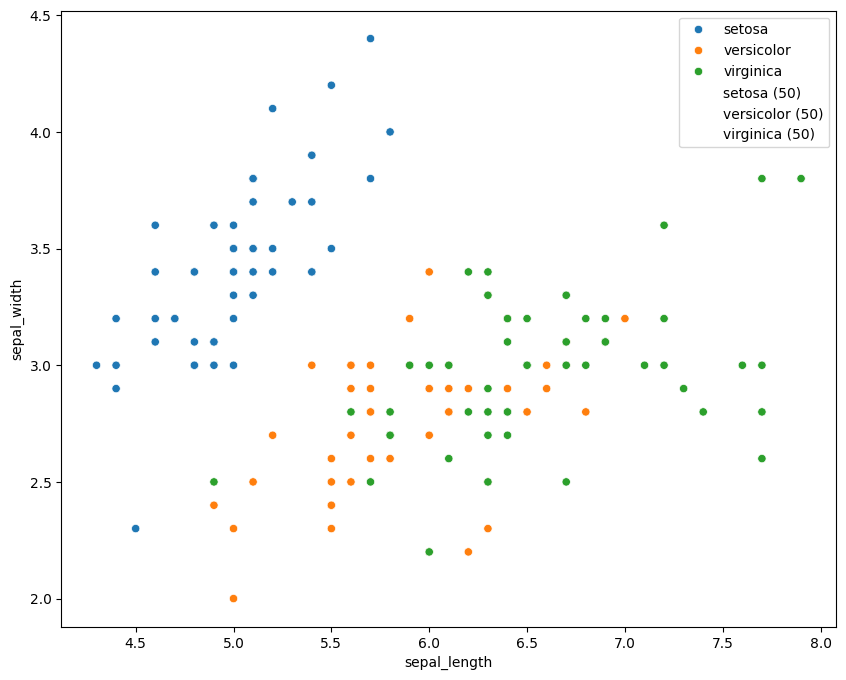

In [126]:
# Create a scatterplot of the same (or different) pair of variables. Add a second legend which will show thew number of datapoints in each category.
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# Count for data points in each species
counts = df['species'].value_counts()

# creating a second custom legend for counts
for i, species in enumerate(counts.index):
    plt.scatter([], [], label=f'{species} ({counts.iloc[i]})', alpha=0.0)

# Show legend
plt.legend()


# Show plot
plt.show()

## Creating insights from visualisations
Your objective is to use Seaborn to create a visualization that will help identify the top 3 factors that contribute the most to the success of a movie (measured by its IMDB rating). You will need to perform exploratory data analysis on the dataset, manipulate and preprocess the data as necessary, and create a final visualization that clearly conveys your findings.

1. Load the "IMDB Top 1000 Movies" dataset into a Pandas DataFrame. You can find the dataset (and some more information about it) hereLinks to an external site..
2. Perform any necessary data cleaning and preprocessing to ensure that the dataset is ready for analysis.
3. Use Seaborn to create a set of exploratory visualizations that help you understand the structure and relationships in the data.
4. Identify the top 3 factors that are most strongly correlated with a movie's IMDB rating.

### Load and View dataset

In [184]:
# load the dataset
df = pd.read_csv("IMDB top 1000.csv")
df.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [185]:
df.tail()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
995,995,398. Scent of a Woman (1992),R,156 min,Drama,8.0,NaN,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M"
996,996,399. Aladdin (1992),G,90 min,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M"
997,997,400. JFK (1991),R,189 min,"Drama, History, Thriller",8.0,72.0,New Orleans District Attorney Jim Garrison dis...,"Director: Oliver Stone | Stars: Kevin Costner,...","Votes: 139,634 | Gross: $70.41M"
998,998,301. Nights of Cabiria (1957),Not Rated,110 min,Drama,8.1,NaN,A waifish prostitute wanders the streets of Ro...,Director: Federico Fellini | Stars: Giulietta ...,"Votes: 42,160 | Gross: $0.75M"
999,999,302. Throne of Blood (1957),Not Rated,110 min,"Drama, History",8.1,NaN,"A war-hardened general, egged on by his ambiti...",Director: Akira Kurosawa | Stars: Toshirô Mifu...,"Votes: 45,579"


In [186]:
# let us view the column names and data types and count to look for available null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


### Data Cleaning

In [187]:
df.columns

Index(['Unnamed: 0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')

In [188]:
df.drop('Unnamed: 0',axis=1,  inplace=True)
df.columns

Index(['Title', 'Certificate', 'Duration', 'Genre', 'Rate', 'Metascore',
       'Description', 'Cast', 'Info'],
      dtype='object')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Certificate  973 non-null    object 
 2   Duration     1000 non-null   object 
 3   Genre        1000 non-null   object 
 4   Rate         1000 non-null   float64
 5   Metascore    712 non-null    float64
 6   Description  1000 non-null   object 
 7   Cast         1000 non-null   object 
 8   Info         1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


Since duration is object let us change column name to Duration (min then delete 'min' in the rows and change the column to integer datatype)

In [190]:
# Rename column name
df.rename(columns={'Duration': 'Duration(minutes)'}, inplace=True)
# Confirm renamed column
df.columns

Index(['Title', 'Certificate', 'Duration(minutes)', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')

In [191]:
# Remove min from row values of the column
df['Duration(minutes)']=df['Duration(minutes)'].str.replace(' min', ' ')
# convert data type now to numeric
df['Duration(minutes)'] = pd.to_numeric(df['Duration(minutes)'])
# confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1000 non-null   object 
 1   Certificate        973 non-null    object 
 2   Duration(minutes)  1000 non-null   int64  
 3   Genre              1000 non-null   object 
 4   Rate               1000 non-null   float64
 5   Metascore          712 non-null    float64
 6   Description        1000 non-null   object 
 7   Cast               1000 non-null   object 
 8   Info               1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


We can see Certificate and Metascore has some missing values. Let us check how many.

In [192]:
# Check for missing values
df.isnull().sum()

Title                  0
Certificate           27
Duration(minutes)      0
Genre                  0
Rate                   0
Metascore            288
Description            0
Cast                   0
Info                   0
dtype: int64

Check percentages of missing values and deal with them in certifictae column

In [193]:
(df['Certificate'].isnull().sum() / len(df)) * 100

2.7

We could drop the missing values in Certificate since they are only 2.7% but let us do a foward fill to maintain our data count

In [194]:
df['Certificate'] = df['Certificate'].ffill()
# confirm
(df['Certificate'].isnull().sum() / len(df)) * 100

0.0

Now check percentages of missing values and deal with them in Metascore column

In [195]:
(df['Metascore'].isnull().sum()/len(df))*100

28.799999999999997

The percentage is more than a quater hence deleting would make us lose a lot of data. We will do a  fill  missing values in metascore with mean because the column is non sequential.

In [196]:
# df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())
# confirm
(df['Metascore'].isnull().sum() / len(df)) * 100

0.0

In [197]:
df.columns

Index(['Title', 'Certificate', 'Duration(minutes)', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')